# SafeML Implementation for German Traffic Sign Recognition
In this example, we try to show how SafeML approach can be used for German Traffic Sign Recognition.We have used an existing code from the following URL that do the traffic sign classification using Convolutional Neural Networks (CNNs) with about 97% accuracy. Then the SafeML part is added to show how the safety of the approach can be monitored:

Source: https://www.kaggle.com/lalithmovva/99-accuracy-on-german-traffic-sign-recognition

Here is the table of content:
* Defining the required libraries and loading the german traffic sgin recognition dataset.
* Separating Train, Test and Validation Data
* Defining the CNN model and its architecture.
* Training the model and calculating its accuracy
* Applying the model on test data
* Comparing the true labels with predicted labels and using the statistical parametric mapping (as the SafeML method)

## Defining the required libraries and loading the german traffic sgin recognition dataset.
Before running the code, the dataset should be downloaded an stored on the local computer. Please make sure that the path has been chosen correctly. 

In [1]:
#Source: https://www.kaggle.com/lalithmovva/99-accuracy-on-german-traffic-sign-recognition
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

for i in range(classes) :
    #path = "C:/cmder/Python_Tests/GTSRB/Train/{0}/".format(i)
    #path = "C:\\AKRAM-Local\\temp\\GTSRB\\GTSRB_Challenge\\train\\{:05d}\\".format(i)
    path = "GTSRB/GTSRB_Challenge/train/{:05d}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]
print("End of block.")

GTSRB/GTSRB_Challenge/train/00000/
GTSRB/GTSRB_Challenge/train/00001/
GTSRB/GTSRB_Challenge/train/00002/
GTSRB/GTSRB_Challenge/train/00003/
GTSRB/GTSRB_Challenge/train/00004/
GTSRB/GTSRB_Challenge/train/00005/
GTSRB/GTSRB_Challenge/train/00006/
GTSRB/GTSRB_Challenge/train/00007/
GTSRB/GTSRB_Challenge/train/00008/
GTSRB/GTSRB_Challenge/train/00009/
GTSRB/GTSRB_Challenge/train/00010/
GTSRB/GTSRB_Challenge/train/00011/
GTSRB/GTSRB_Challenge/train/00012/
GTSRB/GTSRB_Challenge/train/00013/
GTSRB/GTSRB_Challenge/train/00014/
GTSRB/GTSRB_Challenge/train/00015/
GTSRB/GTSRB_Challenge/train/00016/
GTSRB/GTSRB_Challenge/train/00017/
GTSRB/GTSRB_Challenge/train/00018/
GTSRB/GTSRB_Challenge/train/00019/
GTSRB/GTSRB_Challenge/train/00020/
GTSRB/GTSRB_Challenge/train/00021/
GTSRB/GTSRB_Challenge/train/00022/
GTSRB/GTSRB_Challenge/train/00023/
GTSRB/GTSRB_Challenge/train/00024/
GTSRB/GTSRB_Challenge/train/00025/
GTSRB/GTSRB_Challenge/train/00026/
GTSRB/GTSRB_Challenge/train/00027/
GTSRB/GTSRB_Challeng

## Separating Train, Test and Validation Data
In this section, 20% of data is separated for test and validation and the rest is used for training. This section can be improved using methods like K-fold cross-validation. We tried to make it as simple as possible.

In [2]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hot encoding for the train and validation labels
from keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
print("End of block.")

End of block.


## Defining the CNN model and its architecture
Here the CNN model's structure is defined. Regarding the loss function the categorical crossentropy is used, and the ADAM is selection for the network optimization.

In [3]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
print("End of block.")

End of block.


## Training the Model and calculating its accuracy
In this section, the CNN model is trained and the accuracy plot is shown. 

Epoch 1/20
981/981 [==============================] - 135s 138ms/step - loss: 1.4689 - accuracy: 0.5799 - val_loss: 0.3242 - val_accuracy: 0.9075
Epoch 2/20
981/981 [==============================] - 142s 145ms/step - loss: 0.4834 - accuracy: 0.8491 - val_loss: 0.1533 - val_accuracy: 0.9614
Epoch 3/20
981/981 [==============================] - 134s 137ms/step - loss: 0.3215 - accuracy: 0.9004 - val_loss: 0.1020 - val_accuracy: 0.9744
Epoch 4/20
981/981 [==============================] - 133s 135ms/step - loss: 0.2492 - accuracy: 0.9222 - val_loss: 0.0842 - val_accuracy: 0.9800
Epoch 5/20
981/981 [==============================] - 138s 141ms/step - loss: 0.2230 - accuracy: 0.9318 - val_loss: 0.0571 - val_accuracy: 0.9865
Epoch 6/20
981/981 [==============================] - 139s 141ms/step - loss: 0.2033 - accuracy: 0.9374 - val_loss: 0.0597 - val_accuracy: 0.9833
Epoch 7/20
981/981 [==============================] - 138s 141ms/step - loss: 0.2191 - accuracy: 0.9387 - val_loss: 0.0582 -

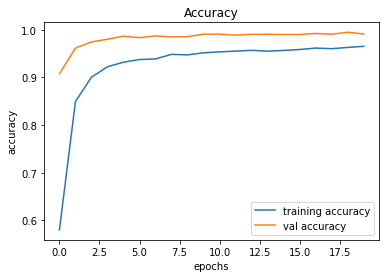

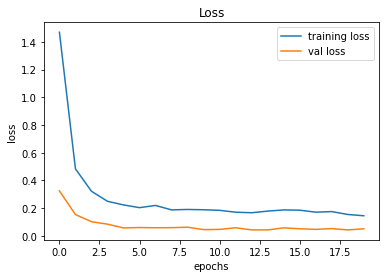

In [4]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
print("End of block.")

## Applying the model on test data
Having trained the CNN model, the test data is used. The predicted decisions has been stored as "y_pred". As can be seen the accuracy of the model is about 0.97%.

In [5]:
#Predicting with the test data
#y_test=pd.read_csv("C:/cmder/Python_Tests/GTSRB/Test.csv")
#y_test=pd.read_csv("C:\\AKRAM-Local\\temp\\GTSRB\\GTSRB_Challenge\\Test.csv")
y_test=pd.read_csv("GTSRB/GTSRB_Challenge/Test.csv")
# labels=y_test['Path'].as_matrix()
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    #image=cv2.imread('C:/cmder/Python_Tests/GTSRB/Test/'+f.replace('Test/', ''))
    #image=cv2.imread('C:\\AKRAM-Local\\temp\\GTSRB\\GTSRB_Challenge\\archive\\Test\\'+f.replace('Test/', ''))
    image=cv2.imread('GTSRB/GTSRB_Challenge/archive/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
y_pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score

print(y_pred)

accuracy_score(y_test, y_pred)

print("End of block.")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[16  1 38 ... 32  7 10]
End of block.


## Loading pre-trained YOLO network
<p style='text-align: justify;'> 
We trained a YOLO network to detect vehicle in images, from a traffic camera view. We used CARLA for recording these images.

In [1]:
import torch
from models import *
from utils.datasets_old import *
from utils.utils_old import *
from torch.utils.data import DataLoader


DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#print(Darknet)

YOLO_model = Darknet("cfg/IESE/yolov3-custom.cfg", img_size=416).to(DEVICE)
load_darknet_weights(YOLO_model, weights="weights/IESE/yolov3_ckpt_42.weights")
YOLO_model.eval()  # Set model in evaluation mode

print("End of block.")

Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
End of block.


###  Loading the test images 
We test on the recorded dataset on CARLA.

In [2]:
import os
import random

img_size=416

dataset_path = "data/IESE_samples/IntersectionVehicle/imgs/"
dataset_labels = "data/IESE_samples/IntersectionVehicle/labels/"

# Select random K sample
K = 1
samp = random.sample(os.listdir(dataset_path), K)
labe = [os.path.splitext(n)[0]+".txt" for n in samp]
#print(labe)

#dataset = RMC_Seq_Dataset(base_folder='/home/tux/Desktop/Data')
#dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=1)

print("End of the block")


End of the block


###  YOLO prediction and comparison 
Use YOLO to predict the images and compare the result with ground truth.

In [3]:
from PIL import Image
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision.transforms import ToTensor
import numpy as np

imgs = list()
labes = []
predictions = []

def pad_to_square(img, pad_value):
    c, h, w = img.shape
    dim_diff = np.abs(h - w)
    # (upper / left) padding and (lower / right) padding
    pad1, pad2 = dim_diff // 2, dim_diff - dim_diff // 2
    # Determine padding
    pad = (0, 0, pad1, pad2) if h <= w else (pad1, pad2, 0, 0)
    # Add padding
    img = F.pad(img, pad, "constant", value=pad_value)
    return img, pad

def resize(image, size):
    image = F.interpolate(image.unsqueeze(0), size=size, mode="nearest").squeeze(0)
    return image

Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

for im, l in zip(samp, labe):
    img = Image.open(os.path.join(dataset_path, im)).convert('RGB')
    #img.show()    
    corr_raw = torch.from_numpy(np.loadtxt(fname=os.path.join(dataset_labels, l), delimiter=' ')[:, 1:])
    corr = xywh2xyxy(corr_raw)#*416.0
    corr[:, 0::2] *= 1320
    corr[:, 1::2] *= 720
    corr = np.insert(corr, 0, np.zeros(corr.shape[0]), axis=1)
    corr = corr.to(DEVICE)
    
    img = transforms.ToTensor()(img)
    img, _ = pad_to_square(img, 0)
    img = resize(img, 416)
    img = img.unsqueeze(0)
    #img = img.reshape(-1)
    #img = img.reshape(1,3,416,416)
    
    #print(img.shape, img.dtype)
    img = Variable(img.to(DEVICE))

    with torch.no_grad():
        #inp = torch.zeros((1,3,416,416)).to(DEVICE)
        
        outputs = YOLO_model(img)
        outputs = outputs[0]
        outputs = non_max_suppression(outputs, conf_thres=0.8, nms_thres=0.4)[0]
        preds = rescale_boxes(outputs, 416, (720,1320))
        #print(preds.shape)

        #preds_, corr_ = preds.unsqueeze(0).to(DEVICE), corr.unsqueeze(0).to(DEVICE)
        #stats = get_batch_statistics(preds_, corr_, 0.1)
        
        #print(bbox_wh_iou(preds[0, :4], corr[0, 1:5]))
        iou_threshold = 0.1
        print('The avg. correctness is: ', avg_correctness_by_iou(preds[:, :4], corr[:, 1:5], iou_threshold))


        
    #print(preds, corr)
    

The avg. correctness is:  0.8


## Comparing the true labels with predicted labels and using the statistical parametric mapping (as the SafeML method)
<p style='text-align: justify;'> 
The idea of SafeML is to measure statistical distances and estimate the accuracy of the model when there is no available labels. Having an accuracy estimation at run time can be so vital for safety-critical applications. In this section, the statistical difference is addressed and the accuracy estimation will be considered on our later versions. Here, we simply find the test data where y_test is not equal to the predicted one (y_pred) and name it as X_test_wrong, y_test_wrong. Then for example, for label == 2, we compare the trained data (trusted data) and the X_test_wrong (selecting only label 2 ones for instance). Then using statistical parametric mapping, we try to find the statistical explanation to see what was different that our CNN model made a wronge decision. This explanation can be investigated in different perspectives and we just provide a sample.</p>

To find more about SafeML idea, please check our GitHub:

https://github.com/ISorokos/SafeML

In [104]:
# Addition: Working on CARLA

import os
from matplotlib import pyplot
import spm1d

ModuleNotFoundError: No module named 'spm1d'

438
End of block.


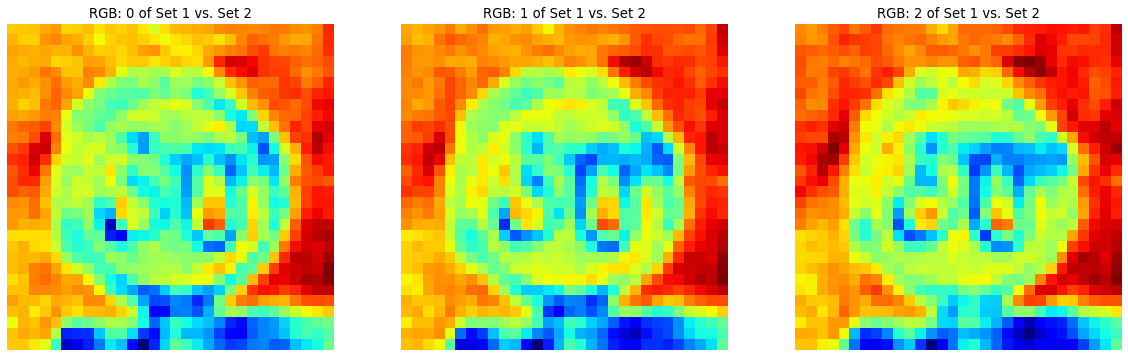

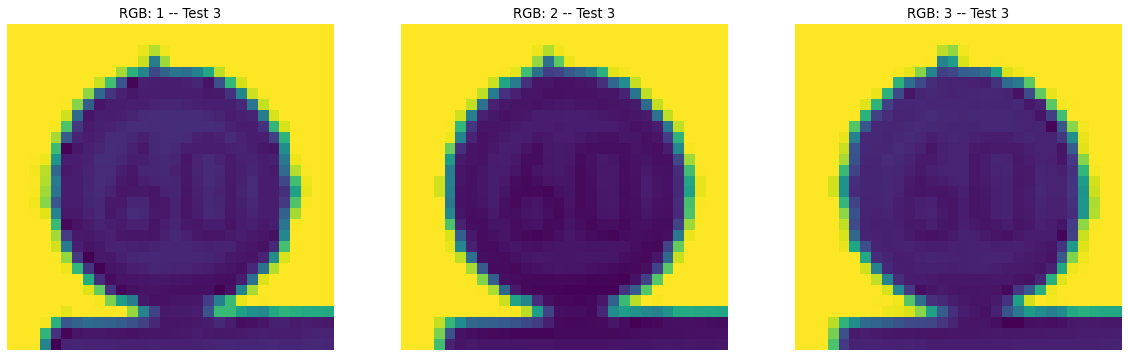

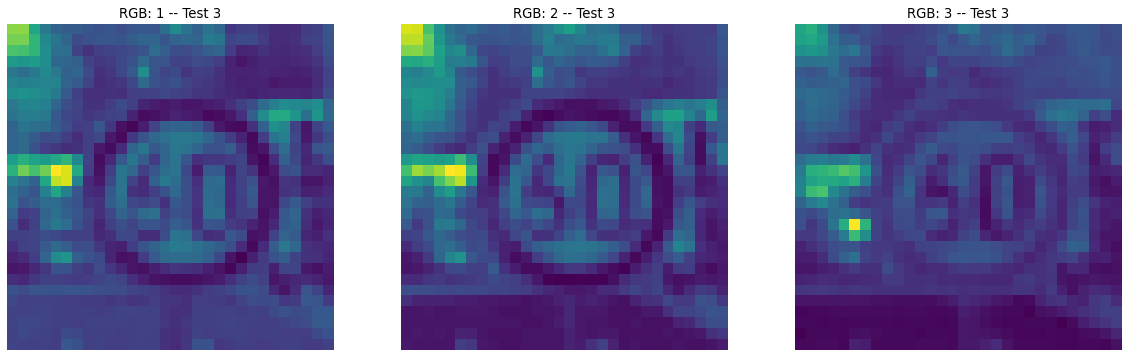

In [10]:
import os
from matplotlib import pyplot
import spm1d

# Separating Wrong Responses of the CNN Classifier
X_test_wrong, y_test_wrong = X_test[np.where(y_test != y_pred)], y_test[np.where(y_test != y_pred)]
print(len(y_test_wrong))

# print(X_test_wrong.shape)

# Finding Wrong Decisions for Label 2 (just an example)
X_test_wrong3, y_test_wrong3 = X_test_wrong[np.where(y_test_wrong == 3)], y_test_wrong[np.where(y_test_wrong == 3)]

# print(X_test_wrong1.shape)

X_train3 = X_train[np.where(y_train[:,3] == 1)]


fig2, ax6 = pyplot.subplots(1,3, figsize = (20,6))

for ii, c_ax in enumerate(ax6.flatten()):
    # Comparing X_train for Label == 2 with X_Test_wronge for Label == 2
    xxx, yyy= X_train3[:,:,:,ii], X_test_wrong3[:,:,:,ii]
    xxx_2   = np.array([yy.flatten() for yy in xxx])
    yyy_2   = np.array([yy.flatten() for yy in yyy]) 
    snpm    = spm1d.stats.nonparam.ttest2(xxx_2[:30], yyy_2[:30])
    snpmi   = snpm.inference(0.05, two_tailed=True, iterations=1000) # Alpha is considered as 0.05
    
   # print(xxx_2.shape)
    J,Q     = xxx_2.shape
    z       = snpmi.z
    zstar   = snpmi.zstar
    z0      = np.zeros(Q)
    z0      = z
    Z0      = np.reshape(z0, (30,30))
    Z0i     = Z0.copy()
    Z0i[np.abs(Z0i)<zstar] = 0
    ZZ      = np.hstack( [Z0, Z0i] )
    
    c_ax.imshow(Z0, 'jet') # Can be replaced with Z0i
    c_ax.set_title('RGB: {} of Set {} vs. Set {}'.format(ii, 1,2))
    c_ax.axis('off')

fig3, ax7 = pyplot.subplots(1,3, figsize = (20,6))    

for ii, c_ax in enumerate(ax7.flatten()):
    c_ax.imshow(X_train3[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, 3))
    c_ax.axis("off")
    
fig4, ax8 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax in enumerate(ax8.flatten()):
    c_ax.imshow(X_test_wrong3[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test_wrong3[1]))
    c_ax.axis('off')

print("End of block.")

## LIME Practice
Here is some draf codes and it should be ignored.

In [11]:
# %tensorflow_version 1.x
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)

warnings.filterwarnings('ignore')

print("End of block.")

Notebook running: keras  2.4.3
End of block.


End of block.


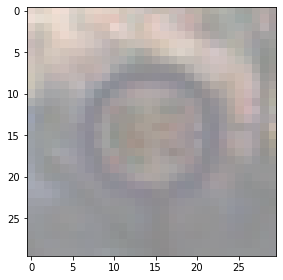

In [12]:
skimage.io.imshow(X_test_wrong3[0]/2+0.5) # Show image before inception preprocessing

print("End of block.")

End of block.


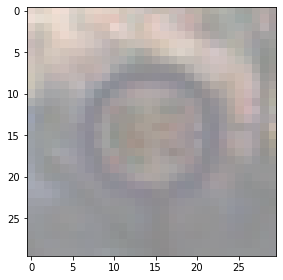

In [13]:
Xi = X_test_wrong3[0]
Xi[np.newaxis,:,:,:]

skimage.io.imshow(Xi/2+0.5)

print("End of block.")

[5]
End of block.


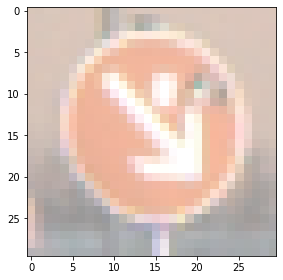

In [14]:
np.random.seed(222)

preds = model.predict_classes(Xi[np.newaxis,:,:,:])
print(preds)

skimage.io.imshow(X_train[5]/2+0.5)

print("End of block.")

In [15]:
#top_pred_classes = preds[0].argsort()[-5:][::-1]
#top_pred_classes                #Index of top 5 classes
top_pred_classes = preds[0]

print("End of block.")

End of block.


7
End of block.


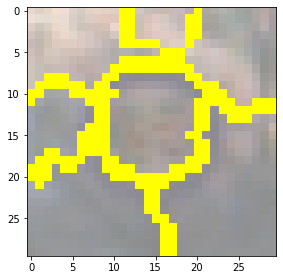

In [16]:
Xi = Xi.astype('double') 
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=1,max_dist=20, ratio=0.01)
num_superpixels = np.unique(superpixels).shape[0]
print(num_superpixels)

skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))

print("End of block.")

In [17]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation
print("End of block.")

End of block.


End of block.


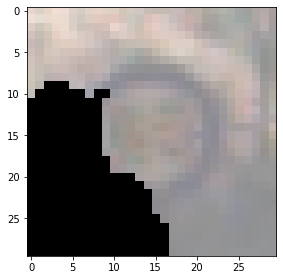

In [18]:
global perturbed_image2
def perturb_image(img,perturbation,segments):
    active_pixels = np.where(perturbation == 1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
        mask[segments == active] = 1 
        global perturbed_image
        perturbed_image = copy.deepcopy(img)
        perturbed_image = perturbed_image*mask[:,:,np.newaxis]
    return perturbed_image

skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[0],superpixels))

predictions = []
for pert in perturbations:
    perturbed_img = perturb_image(Xi/2+0.5,pert,superpixels)
    pred = model.predict_classes(perturbed_img[np.newaxis,:,:,:])
    predictions.append(pred)

predictions = np.array(predictions)
predictions.shape
# print(predictions)
print("End of block.")

In [19]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances[0])
distances.shape
print("End of block.")

0.15484574527148343
End of block.


In [20]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape
print("End of block.")

End of block.


In [21]:
class_to_explain = top_pred_classes
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff
# np.argsort(coeff)
print("End of block.")

End of block.


In [22]:
num_top_features = 6
top_features = np.argsort(coeff)[-num_top_features:] 
top_features
print("End of block.")

End of block.


End of block.


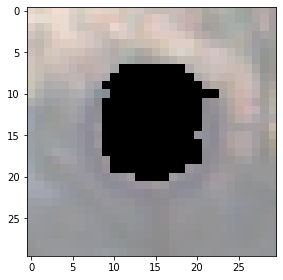

In [23]:
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi/2+0.5,mask,superpixels) )
print("End of block.")

(30, 30, 1)
(30, 30, 1)
End of block.


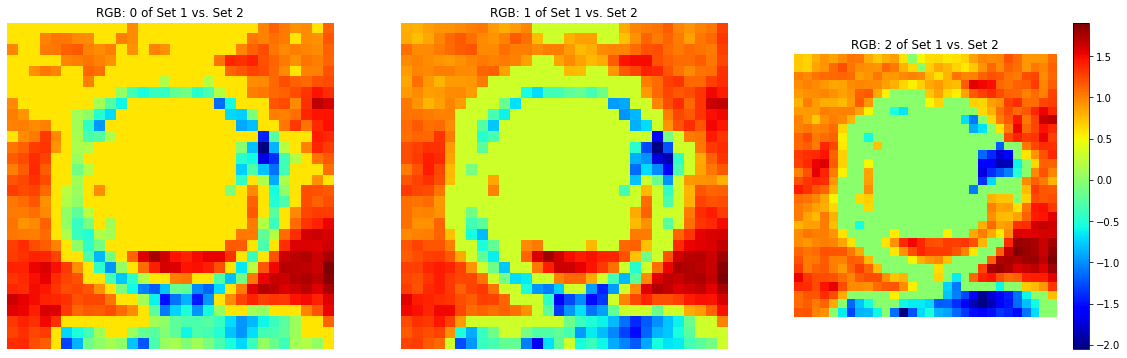

In [24]:
X_test_wrongprint(Z0[:,:,np.newaxis].shape)
im2 = perturb_image(Z0[:,:,np.newaxis],mask,superpixels)
print(im2.shape)
#skimage.io.imshow( )

fig7, ax77 = pyplot.subplots(1,3, figsize = (20,6))

for ii, c_ax in enumerate(ax77.flatten()):
    # Comparing X_train for Label == 2 with X_Test_wronge for Label == 2
    xxx, yyy= X_train3[:,:,:,ii], X_test_wrong3[:,:,:,ii]
    xxx_2   = np.array([yy.flatten() for yy in xxx])
    yyy_2   = np.array([yy.flatten() for yy in yyy]) 
    snpm    = spm1d.stats.nonparam.ttest2(xxx_2[:30], yyy_2[:30])
    snpmi   = snpm.inference(0.05, two_tailed=True, iterations=1000) # Alpha is considered as 0.05
    
   # print(xxx_2.shape)
    J,Q     = xxx_2.shape
    z       = snpmi.z
    zstar   = 0.5
    z0      = np.zeros(Q)
    z0      = z
    Z0      = np.reshape(z0, (30,30))
    Z0i     = Z0.copy()
    Z0i[np.abs(Z0i)<zstar] = 0
    ZZ      = np.hstack( [Z0, Z0i] )
    
    active_pixels2 = np.where(mask == 1)[0]
    mask2 = np.zeros(superpixels.shape)
    for active2 in active_pixels2:
        mask2[superpixels == active2] = 1 
        perturbed_image = copy.deepcopy(Z0i)
        perturbed_image = perturbed_image*mask2
    
    c_ax.imshow(perturbed_image, 'jet') # Can be replaced with Z0i
    #pyplot.colorbar(mappable=c_ax.images[0])
    # c_ax.imshow(perturb_image(Xi/2+0.5,mask,superpixels))
    c_ax.set_title('RGB: {} of Set {} vs. Set {}'.format(ii, 1,2))
    c_ax.axis('off')
    
pyplot.colorbar(mappable=c_ax.images[0])

print("End of block.")